# Analisis de Sentimientos en Twitter sobre 2 topics

![](https://miro.medium.com/max/1400/1*sNd2NZUR4dMBQhN8l6Padw.jpeg)

# Conexión al API de twitter

In [ ]:
# importamos la librería tweepy: pip install tweepy
!pip install tweepy
import tweepy
%matplotlib inline

In [ ]:
from time import sleep
from datetime import datetime
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Claves de acceso al API de twitter

In [ ]:
API_KEY = 'wIbOeU2k3iuuZq6fzjDArIzD2'
API_KEY_SECRET = 'ZJ2TZUeU8GbvIcVXkq2L9elDvFCRfKIL7U5Enkj69sf2E9TRDf'
BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAAJnGZQEAAAAAEC6zs1nUmfY9xE4rVOvMYZkBJs0%3DYxBRfHzvoOrlK1959iNYBVor4LG2jbdqAcKE4JjuNwxqPeGc4G'
ACCESS_TOKEN = '1372960614692356103-6zCY2RI96KYBRHx37HeDJ8vLwwvLOV'
ACCESS_TOKEN_SECRET = '4D4RcCVznMzyKtNG2Nj7gA8BPIeXYNI2TlJs9lSyTutCp'



Usamos claves para autentificarnos y obtener instancia de twitter

In [ ]:
auth = tweepy.OAuthHandler(API_KEY,API_KEY_SECRET)
auth.set_access_token(ACCESS_TOKEN,ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# Verificamos la conexión
print(api.me().name)

Daniel Ruiz Santamaría


# Insertamos un termino de búsqueda para filtrar los tweets

In [ ]:
# Preguntamos el termino por el cual vamos a filtrar los tweets
# Putin
# Zelenski
palabras = []
while len(palabras)<2:
  palabra = input("Inserta una palabra para obtener para obtener Tweets: ")
  if palabra is not '':
    palabras.append(palabra)
print('Se va ha realizar la búsqueda comparativa con las palabras',palabras)

Inserta una palabra para obtener para obtener Tweets: putin
Inserta una palabra para obtener para obtener Tweets: zelenski
Se va ha realizar la búsqueda comparativa con las palabras ['putin', 'zelenski']


In [ ]:
# Preguntamos por el número de tweets a capturar
numero_de_tweets = input(u"Número de tweets a capturar: ")
if numero_de_tweets is '':
  numero_de_tweets = 500
else: 
  numero_de_tweets = int(numero_de_tweets)

print(f'Número de tweets a capturar: {numero_de_tweets}')

Número de tweets a capturar: 
Número de tweets a capturar: 500


In [ ]:
# Preguntamos por el idioma de los tweets
lenguaje = input("Indioma [[es]/en]: ")
if lenguaje is '':
  lenguaje = 'es'

print(f'Idioma: {lenguaje}')

Indioma [[es]/en]: 
Idioma: es


# Analisis de Sentimiento con TextBlob

In [ ]:
# Función para objeter Tweets y hacer analisis de sentimiento
import re
def ObtenerTweets(palabras, num_tweets,lenguaje):
    data = {'Numero': [],'Topic': [], 'Tweet': [], 'Sentimiento': [], 'Subetividad': []} 
    numero = 1
    for palabra in palabras:
      for tweet in tweepy.Cursor(api.search, palabra+ " -filter:retweets", lang = lenguaje).items(num_tweets):
          try:
              # A partir del tweet se realiza el analisis de sentimiento
              # y se actualizan las listas
              data['Numero'].append(numero)
              data['Topic'].append(palabra)
              clean_text = re.sub("@[A-Za-z0-9_]+","", tweet.text)
              data['Tweet'].append(clean_text)
              analisis = TextBlob(clean_text).sentiment
              data['Sentimiento'].append(analisis.polarity)
              data['Subetividad'].append(analisis.subjectivity)
              numero = numero + 1
          except tweepy.TweepError as e:
              print(e.reason)
          except StopIteration:
              break
    df = pd.DataFrame(data)
    df.set_index('Numero', inplace=True)       
    return df
        

# Obtención del resultado

Invocamos la función para obtener los tweets de las 2 palabras

In [ ]:
df_resultado = ObtenerTweets(palabras, numero_de_tweets,lenguaje)

Mostramos los de la primera palabra

In [ ]:
df_resultado.groupby(['Topic']).describe().T

Topic                   putin    zelenski
Sentimiento count  500.000000  500.000000
            mean    -0.008342    0.001150
            std      0.092647    0.055688
            min     -1.000000   -0.875000
            25%      0.000000    0.000000
            50%      0.000000    0.000000
            75%      0.000000    0.000000
            max      0.600000    0.700000
Subetividad count  500.000000  500.000000
            mean     0.029600    0.007800
            std      0.144707    0.072455
            min      0.000000    0.000000
            25%      0.000000    0.000000
            50%      0.000000    0.000000
            75%      0.000000    0.000000
            max      1.000000    1.000000

Obtenemos los sentimientos no neutrales

In [ ]:
df_resultado[(df_resultado.Sentimiento != 0)]

,Topic,Tweet,Sentimiento,Subetividad
Numero,,,,
1,putin,El Spartak es el equipo de la derecha en Rusia...,0.600000,0.900000
20,putin,NO ME EXTRAÑA QUE EL MALDITO Y CRIMINAL DE ...,-0.400000,0.550000
46,putin,#NaziRussia propaganda \n\nhttps://t.co/g8cL8o...,-0.100000,0.100000
129,putin,"Brutal este artículo.\n\nMedvedev: ""Una nación...",-0.687500,1.000000
145,putin,Que el presidente de Rusia desde hace muchos a...,-0.400000,0.550000
158,putin,"Bueno, y que, que no aciertan, pues es que ...",-0.500000,0.866667
169,putin,Fuerza compañero✌🏽comer asado y comer todos l...,0.600000,0.900000
174,putin,Es increíble.\nDe bombas a lo normal.\n\nLA G...,0.150000,0.650000
182,putin,Porque es igual de criminal que Putin y viol...,-0.400000,0.550000


# Visulizació de resultados y Categorización

In [ ]:
# Creating a wordcloud to create a visualisation of the frequent words.
all_words = ''.join([twts for twts in df_resultado['Tweet']]) # Stores all the words in one string
all_words

'El Spartak es el equipo de la derecha en Rusia, de los pocos (si no el único popular) que en los tiempos de la URSS… https://t.co/gLKtibRubN La extrema derecha pagada por Putin esta dando sus frutos en toda Europa. El Fernández después de la jalada de bolas que le echo al presidente Putin, lo traicionó votando a fa… https://t.co/ThNiBjtgCL Vergüenza que el Papa sea argentino y esté a favor de delincuentes y genocidas: putin, maduro, los Castro, los Kirchner 🤮Dicen que le contaron a Putin que  estaba muy bravo, pero dizque Putin preguntó ¿y quién es ese ?. Nadie supo responder. Adriana, no es rendirse es negociar para detener la destrucción de su país.Ya Putin se anexó parte de U… https://t.co/SHh6jkkOuiDuque saca pecho diciendo que marca distancia con Putin, pero más distancia ha marcado con los muertos diarios del… https://t.co/jcLZunmuVo Putin apoya todos los movimientos que socaven la democracia liberal en el mundo.\n\nEn Europa estos movim… https://t.co/uQuzRVHvKZGranma repite las

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

Palabras más determinantes para el topic 1

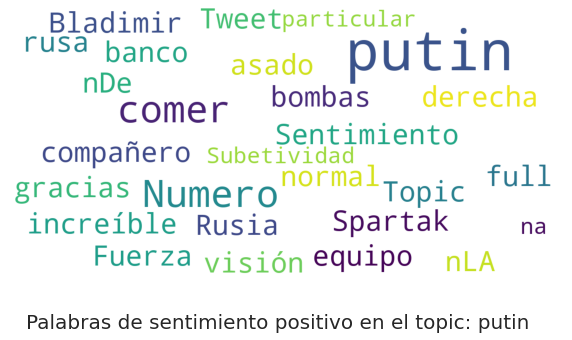


----------------------------------------------------------------------------------------------------



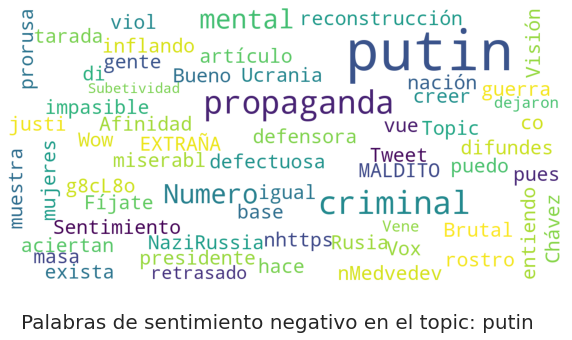

In [ ]:
show_wordcloud(df_resultado[(df_resultado.Sentimiento > 0) & (df_resultado.Topic == palabras[0])],f'Palabras de sentimiento positivo en el topic: {palabras[0]}')
print(f"\n{'-'*100}\n")
show_wordcloud(df_resultado[(df_resultado.Sentimiento < 0) & (df_resultado.Topic == palabras[0])],f'Palabras de sentimiento negativo en el topic: {palabras[0]}')

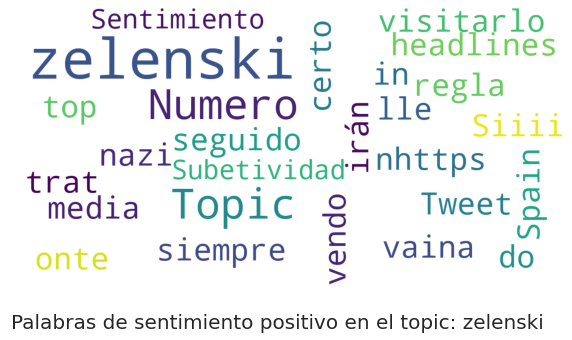


----------------------------------------------------------------------------------------------------



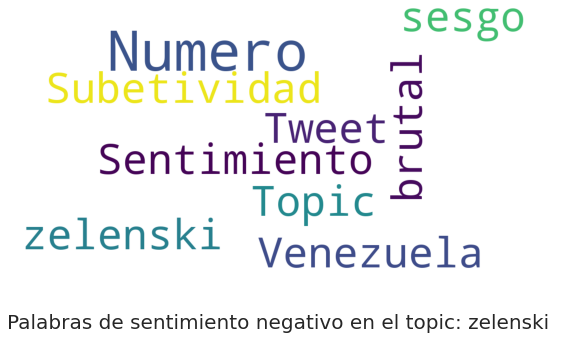

In [ ]:
show_wordcloud(df_resultado[(df_resultado.Sentimiento > 0) & (df_resultado.Topic == palabras[1])],f'Palabras de sentimiento positivo en el topic: {palabras[1]}')
print(f"\n{'-'*100}\n")
show_wordcloud(df_resultado[(df_resultado.Sentimiento < 0) & (df_resultado.Topic == palabras[1])],f'Palabras de sentimiento negativo en el topic: {palabras[1]}')

Histograma

In [ ]:
df_resultado['Ratio_polaridad'] = df_resultado['Sentimiento'].apply(lambda x: 'Positivo' if x > 0 else('Neutral' if x == 0  else 'Negativo'))

[Text(0.5, 1.0, 'Sentimiento para el Topic putin')]

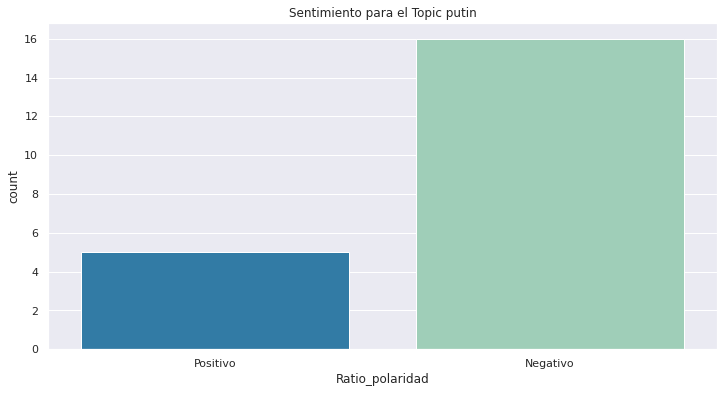

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Ratio_polaridad',data=df_resultado[(df_resultado.Sentimiento != 0) & (df_resultado.Topic == palabras[0])], palette='YlGnBu_r').set(title=f'Sentimiento para el Topic {palabras[0]}')

[Text(0.5, 1.0, 'Sentimiento para el Topic zelenski')]

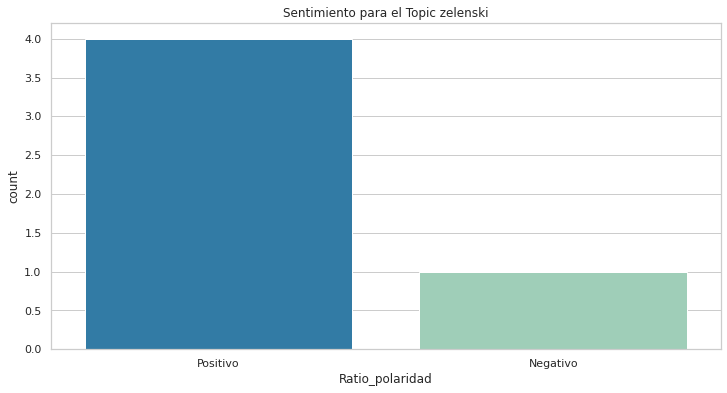

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='Ratio_polaridad',data=df_resultado[(df_resultado.Sentimiento != 0) & (df_resultado.Topic == palabras[1])], palette='YlGnBu_r').set(title=f'Sentimiento para el Topic {palabras[1]}')

Pintar en un Scatter Plot con etiquetas

In [ ]:
from math import sin
from random import random

from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper
from bokeh.palettes import plasma
from bokeh.plotting import figure
from bokeh.transform import transform
from bokeh.models import Range1d
import numpy as np
from bokeh.models import Span

def GraficarDatos(df, topic):
    list_x = list(range(len(df)))
    list_y = df['Sentimiento']
    desc = [str(i) for i in df['Tweet']]

    polaridadPromedio = (sum(df['Sentimiento'])/(len(df['Sentimiento'])))
    # polaridadPromedio = "{0:.2f}%".format(polaridadPromedio * 100)

    source = ColumnDataSource(data=dict(x=list_x, y=list_y, desc=desc))
    hover = HoverTool(tooltips=[
        ('Tweet', '@desc'),
    ])
    mapper = LinearColorMapper(palette=plasma(256), low=min(list_y), high=max(list_y))

    p = figure(plot_width=1200, plot_height=600, tools=[hover], title=f"Sentimientos sobre Topic '{topic}'")
    p.y_range = Range1d(-1,1)
    # p.line([0, list(range(len(df)))], [0,0], legend="y(x) = 0")
    hline = Span(location=0, dimension='width', line_color='green', line_width=1, line_dash='dotted')
    hline2 = Span(location=polaridadPromedio, dimension='width', line_color='red', line_width=3)
    p.circle('x', 'y', size=10, source=source,
            fill_color=transform('y', mapper))

    output_file('test.html')
    p.renderers.extend([hline,hline2])
    show(p)

Pintamos los datos para 

In [ ]:
GraficarDatos(df_resultado[(df_resultado.Sentimiento != 0) & (df_resultado.Topic == palabras[0])],palabras[0])

Ahora graficamso los datos de el Topic 2

In [ ]:
GraficarDatos(df_resultado[(df_resultado.Sentimiento != 0) & (df_resultado.Topic == palabras[1])],palabras[1])

In [ ]:
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [ ]:
print_full(df_resultado[(df_resultado.Sentimiento != 0)][['Tweet','Sentimiento','Ratio_polaridad']].sort_values(by=['Sentimiento'],ascending=False))

                                                                                                                                                      Tweet          Sentimiento Ratio_polaridad
Numero                                                                                                                                                                                          
874                                          (Por certo, vendo o nazi de onte ó que lle dou bola o actor Zelenski, qué decadencia de "raza superior"...😂😂😂)                 0.70        Positivo
1              El Spartak es el equipo de la derecha en Rusia, de los pocos (si no el único popular) que en los tiempos de la URSS… https://t.co/gLKtibRubN                 0.60        Positivo
169                         Fuerza compañero✌🏽comer asado y comer todos los días es de cheto... Lo nacional y popular es comer pol… https://t.co/4fGDfLcRH5                 0.60        Positivo
939     🇪🇸 Spain top topics in medi